 
# Introduction

The objective of this Machine Learning project is to predict **Mpg** for a given car. 

Mpg stands for **Miles per gallon**, and is used to show how far your car is able to travel for every gallon (or 4.55 litres) of fuel it uses.


This is a supervised learning.

We have to predict Miles per gallon. It is a measure of fuel economy of a car and it is a numerical value. Hence this is a regression task.

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the data

In [2]:
data = pd.read_csv('auto-mpg.csv')

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.shape

(398, 9)

Dataset has 398 observations and 9 feature columns.
Independent variables are :
1. car name  ##Name of the car

2. cylinders ##Number of Cylinders

3. displacement ##Engine displacement is the swept volume of pistons inside the cylinders.Displacement has an impact on increasing car power or fuel efficiency.

4. horsepower ##Horsepower (hp) is the metric used to indicate the power produced by a car's engine

5. weight ##weight of car
6. acceleration ##Acceleration is the rate of change of velocity as a function of time

7. model year
8. origin

Dependent variable is:
9. mpg

In [5]:
#Checking the data type of the columns.

def check_data_types(data):
    data_types = data.dtypes.reset_index()
    data_types.columns = ['columnn_name','data_type']
    return data_types 

In [6]:
check_data_types(data)

,columnn_name,data_type
0,mpg,float64
1,cylinders,int64
2,displacement,float64
3,horsepower,object
4,weight,int64
5,acceleration,float64
6,model year,int64
7,origin,int64
8,car name,object


We have 7 numeric(3 continuous and 4 discrete) and 2 object columns. Here 'horsepower' should be a numeric value and not an object .let us change the datatype of horsepower from object to numeric.

In [7]:
data.loc[data.horsepower=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [8]:
#There are 6 rows with '?' in the column 'horsepower'. Let us remove these rows.
data = data.loc[data.horsepower!='?']

In [9]:
#Now, lets try changing the datatype of horsepower from object to float64
data['horsepower'] = data['horsepower'].astype('float64')

In [10]:
check_data_types(data)

,columnn_name,data_type
0,mpg,float64
1,cylinders,int64
2,displacement,float64
3,horsepower,float64
4,weight,int64
5,acceleration,float64
6,model year,int64
7,origin,int64
8,car name,object


Data type changed to float. let us save our features in different lists based on their data types.

In [11]:
numerical_cont = ['displacement', 'horsepower', 'weight', 'acceleration','mpg']
numerical_discrete = ['cylinders','model_year', 'origin']
categorical = ['car_name']

In [12]:
#Checking missing values. No missing values are present in the data.
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [13]:
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320


# Exploring the data

Let us study the correlation between the columns.

In [14]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


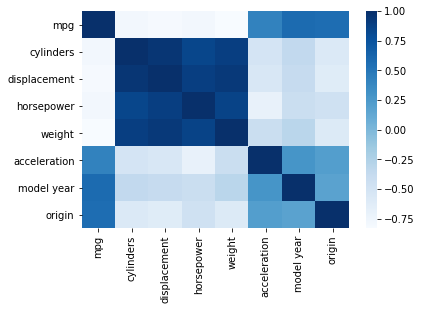

In [15]:
sns.heatmap(data.corr(),cmap='Blues')

Let us plot scatter plots to view the relationship between the numerical predictors.

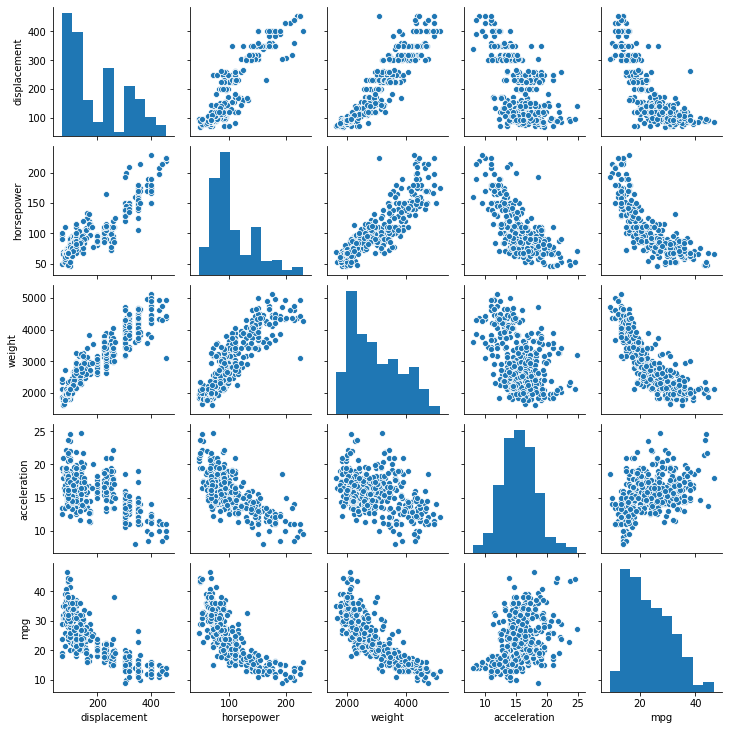

In [16]:
sns.pairplot(data[numerical_cont], height=2)

From the last row of above plot, we can observe the relationship between mpg and other predictors displacement, horsepower, weight, acceleration. As observed from the correlation matrix, displacement, horsepower and weight are negatively correlated with mpg. acceleration doesn't show strong correlation with acceleration.

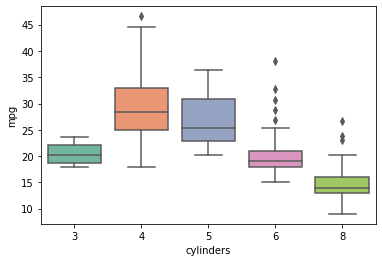

In [17]:
sns.boxplot(x = 'cylinders', y = 'mpg', data = data, palette = "Set2")

Mpg of cars having Cylinder 4 is the highest. 

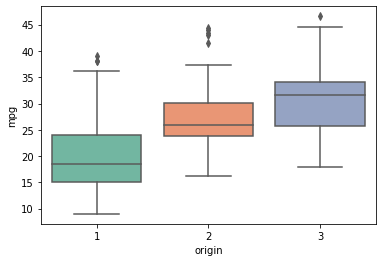

In [18]:
sns.boxplot(x = 'origin', y = 'mpg', data = data, palette = "Set2")

Origin column is basically the origin where car was manufactured. On average cars from origin 3 have higher mpg.

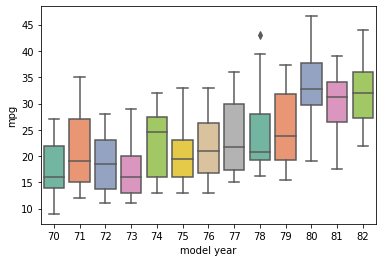

In [19]:
sns.boxplot(x = 'model year', y = 'mpg', data = data, palette = "Set2")

median mpg of cars seem to be increasing with each year.

In [20]:
#columns name
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [21]:
col=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name']

In [22]:
#Checking the Value counts of all variables
for x in col:
    print(data[x].value_counts(sort=False))
    print ('-'*80)

18.0    17
15.0    16
16.0    13
17.0     7
14.0    19
        ..
35.1     1
32.9     1
19.8     1
24.2     1
17.6     2
Name: mpg, Length: 127, dtype: int64
--------------------------------------------------------------------------------
3      4
4    199
5      3
6     83
8    103
Name: cylinders, dtype: int64
--------------------------------------------------------------------------------
307.0     3
350.0    18
318.0    17
304.0     7
302.0    11
         ..
455.0     3
383.0     2
351.0     8
305.0     4
267.0     1
Name: displacement, Length: 81, dtype: int64
--------------------------------------------------------------------------------
130.0     5
165.0     4
150.0    22
140.0     7
198.0     2
         ..
84.0      6
64.0      1
74.0      3
116.0     1
82.0      1
Name: horsepower, Length: 93, dtype: int64
--------------------------------------------------------------------------------
4096    1
3230    1
4098    1
2051    1
4100    1
       ..
2868    1
2556    1
2045    2
3

#  Building a pipeline for  Data processing

There are 2 different pipelines for processing numerical data and categorical data:
1. num_pipeline has 2 transformers. Imputer for handling missing values and standard scalar for scaling the features. 
2. cat_pipeline has 2 transformers. Imputer for handling the missing values and OneHotEncoder for encoding categorical variables.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder

In [24]:
num_attr = ['displacement', 'horsepower', 'weight', 'acceleration']
cat_attr = ['cylinders']

In [25]:
num_pipeline =Pipeline(steps=[("imputer",SimpleImputer(strategy="mean")),
                              ("scale",StandardScaler())
                             ])
cat_pipeline=Pipeline(steps=[("imputer",SimpleImputer(strategy="median")),
                              ("encoding",OneHotEncoder(handle_unknown='ignore',sparse=False))
                            ])

In [26]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),
        ("cat", cat_pipeline, cat_attr)],remainder='passthrough'
    )

Applying pipeline to dataset

In [28]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [29]:
data_x = data.drop(columns=['mpg','car name','model year','origin'])
data_y = data['mpg']

In [30]:
data_x.head(2)

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5


In [31]:
data_y.head(2)

0    18.0
1    15.0
Name: mpg, dtype: float64

##   Train and Test Split

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size = 0.2,random_state = 42)

##  Fitting Regression Model 

In [33]:
from sklearn.metrics import r2_score

In [34]:
#Linear Regession
from sklearn.linear_model import LinearRegression


model_lr = Pipeline(steps=[('preprocess',full_pipeline),
                           ('Regressor',LinearRegression())])

In [35]:
model_lr.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                          

In [36]:
y_pred = model_lr.predict(x_train)
print('train score is:')
print(r2_score(y_pred,y_train))

y_pred = model_lr.predict(x_test)
print('test score is:')
print(r2_score(y_pred,y_test))

train score is:
0.666808374744424
test score is:
0.6874970156553202


Linear regression model certainly does better than Decision Tree Regressor, XGBoost i.e has near score for both train and test data.so, Considering Linear Regression for Prediction.

In [39]:
data.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [46]:
data_x.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [47]:
#data in the forn of data frame
d=pd.DataFrame([[4,97,52,2130,24.6]],columns=data_x.columns)
d

,cylinders,displacement,horsepower,weight,acceleration
0,4,97,52,2130,24.6


In [48]:
model_lr.predict(d)

array([31.62876742])

### Saving model for deployment (Flask)

In [50]:
import joblib

In [51]:
joblib.dump(model_lr,"final_model_new.pkl")

['final_model_new.pkl']

# Conclusion

Here, I implemented the model to predict the Mpg of a Car.As the Data has many features, I wanted to Genralize the model so that i have considered only  few features i.e 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'. The other features like origin ,model year represents particular values. In this project I used Linear Regression for prediction i.e Decision Tree regressor and XGBoost Regressor have shown less accuracies.Linear Regression Model have near Accuracy for Training as well as Tesing Data.So, succuesflly built the model and predicted the MPG of a Car.